# Import Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV , cross_validate , cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Data Preparation

In [2]:
df = pd.read_csv("US_Air_Quality.csv")
df

Unnamed: 0  CBSA Code        Date  AQI                        Category  \
0         3826793      36540  1998-05-28  115  Unhealthy for Sensitive Groups   
1         3422864      38060  2001-12-20   97                        Moderate   
2         4495176      49420  1993-06-23   14                            Good   
3         1333866      37140  2014-09-04   48                            Good   
4          886851      11260  2016-03-27   43                            Good   
...           ...        ...         ...  ...                             ...   
49995     3638461      17900  1999-10-23   33                            Good   
49996     3323841      10900  2001-07-16   53                        Moderate   
49997     5501610      24860  1982-09-25   93                        Moderate   
49998     4515641      16620  1992-10-02   26                            Good   
49999     2161083      33980  2009-11-02   20                            Good   

      Defining Parameter  Number of Sites Reporting     city_ascii state_id  \
0                  Ozone                          5          Omaha       NE   
1                    NO2                         19        Phoenix       AZ   
2                     CO                          1         Yakima       WA   
3                  Ozone                          2        Paducah       KY   
4                   PM10                          4      Anchorage       AK   
...                  ...                        ...            ...      ...   
49995              Ozone                          4       Columbia       SC   
49996              PM2.5                          4      Allentown       PA   
49997              Ozone                          2     Greenville       SC   
49998                NO2                          1     Charleston       WV   
49999              Ozone                          1  Morehead City       NC   

           state_name      lat       lng  population  density  \
0            Nebraska  41.2627  -96.0529    791432.0   1307.0   
1             Arizona  33.5722 -112.0892   4187723.0   1236.0   
2          Washington  46.5923 -120.5496    126487.0   1302.0   
3            Kentucky  37.0711  -88.6440     24947.0    474.0   
4              Alaska  61.1508 -149.1091    248902.0     66.0   
...               ...      ...       ...         ...      ...   
49995  South Carolina  34.0378  -80.9036    609689.0    378.0   
49996    Pennsylvania  40.5961  -75.4756    688658.0   2664.0   
49997  South Carolina  34.8354  -82.3646    441303.0    905.0   
49998   West Virginia  38.3484  -81.6322    141640.0    579.0   
49999  North Carolina  34.7308  -76.7388      9495.0    498.0   

                  timezone  
0          America/Chicago  
1          America/Phoenix  
2      America/Los_Angeles  
3          America/Chicago  
4        America/Anchorage  
...                    ...  
49995     America/New_York  
49996     America/New_York  
49997     America/New_York  
49998     America/New_York  
49999     America/New_York  

[50000 rows x 15 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 50000 non-null  int64  
 1   CBSA Code                  50000 non-null  int64  
 2   Date                       50000 non-null  object 
 3   AQI                        50000 non-null  int64  
 4   Category                   50000 non-null  object 
 5   Defining Parameter         50000 non-null  object 
 6   Number of Sites Reporting  50000 non-null  int64  
 7   city_ascii                 50000 non-null  object 
 8   state_id                   50000 non-null  object 
 9   state_name                 50000 non-null  object 
 10  lat                        50000 non-null  float64
 11  lng                        50000 non-null  float64
 12  population                 50000 non-null  float64
 13  density                    50000 non-null  flo

In [4]:
df.drop("Unnamed: 0" , axis = 1 , inplace = True)
df

CBSA Code        Date  AQI                        Category  \
0          36540  1998-05-28  115  Unhealthy for Sensitive Groups   
1          38060  2001-12-20   97                        Moderate   
2          49420  1993-06-23   14                            Good   
3          37140  2014-09-04   48                            Good   
4          11260  2016-03-27   43                            Good   
...          ...         ...  ...                             ...   
49995      17900  1999-10-23   33                            Good   
49996      10900  2001-07-16   53                        Moderate   
49997      24860  1982-09-25   93                        Moderate   
49998      16620  1992-10-02   26                            Good   
49999      33980  2009-11-02   20                            Good   

      Defining Parameter  Number of Sites Reporting     city_ascii state_id  \
0                  Ozone                          5          Omaha       NE   
1                    NO2                         19        Phoenix       AZ   
2                     CO                          1         Yakima       WA   
3                  Ozone                          2        Paducah       KY   
4                   PM10                          4      Anchorage       AK   
...                  ...                        ...            ...      ...   
49995              Ozone                          4       Columbia       SC   
49996              PM2.5                          4      Allentown       PA   
49997              Ozone                          2     Greenville       SC   
49998                NO2                          1     Charleston       WV   
49999              Ozone                          1  Morehead City       NC   

           state_name      lat       lng  population  density  \
0            Nebraska  41.2627  -96.0529    791432.0   1307.0   
1             Arizona  33.5722 -112.0892   4187723.0   1236.0   
2          Washington  46.5923 -120.5496    126487.0   1302.0   
3            Kentucky  37.0711  -88.6440     24947.0    474.0   
4              Alaska  61.1508 -149.1091    248902.0     66.0   
...               ...      ...       ...         ...      ...   
49995  South Carolina  34.0378  -80.9036    609689.0    378.0   
49996    Pennsylvania  40.5961  -75.4756    688658.0   2664.0   
49997  South Carolina  34.8354  -82.3646    441303.0    905.0   
49998   West Virginia  38.3484  -81.6322    141640.0    579.0   
49999  North Carolina  34.7308  -76.7388      9495.0    498.0   

                  timezone  
0          America/Chicago  
1          America/Phoenix  
2      America/Los_Angeles  
3          America/Chicago  
4        America/Anchorage  
...                    ...  
49995     America/New_York  
49996     America/New_York  
49997     America/New_York  
49998     America/New_York  
49999     America/New_York  

[50000 rows x 14 columns]

In [5]:
df.drop("CBSA Code" , axis = 1 , inplace = True)
df

Date  AQI                        Category Defining Parameter  \
0      1998-05-28  115  Unhealthy for Sensitive Groups              Ozone   
1      2001-12-20   97                        Moderate                NO2   
2      1993-06-23   14                            Good                 CO   
3      2014-09-04   48                            Good              Ozone   
4      2016-03-27   43                            Good               PM10   
...           ...  ...                             ...                ...   
49995  1999-10-23   33                            Good              Ozone   
49996  2001-07-16   53                        Moderate              PM2.5   
49997  1982-09-25   93                        Moderate              Ozone   
49998  1992-10-02   26                            Good                NO2   
49999  2009-11-02   20                            Good              Ozone   

       Number of Sites Reporting     city_ascii state_id      state_name  \
0                              5          Omaha       NE        Nebraska   
1                             19        Phoenix       AZ         Arizona   
2                              1         Yakima       WA      Washington   
3                              2        Paducah       KY        Kentucky   
4                              4      Anchorage       AK          Alaska   
...                          ...            ...      ...             ...   
49995                          4       Columbia       SC  South Carolina   
49996                          4      Allentown       PA    Pennsylvania   
49997                          2     Greenville       SC  South Carolina   
49998                          1     Charleston       WV   West Virginia   
49999                          1  Morehead City       NC  North Carolina   

           lat       lng  population  density             timezone  
0      41.2627  -96.0529    791432.0   1307.0      America/Chicago  
1      33.5722 -112.0892   4187723.0   1236.0      America/Phoenix  
2      46.5923 -120.5496    126487.0   1302.0  America/Los_Angeles  
3      37.0711  -88.6440     24947.0    474.0      America/Chicago  
4      61.1508 -149.1091    248902.0     66.0    America/Anchorage  
...        ...       ...         ...      ...                  ...  
49995  34.0378  -80.9036    609689.0    378.0     America/New_York  
49996  40.5961  -75.4756    688658.0   2664.0     America/New_York  
49997  34.8354  -82.3646    441303.0    905.0     America/New_York  
49998  38.3484  -81.6322    141640.0    579.0     America/New_York  
49999  34.7308  -76.7388      9495.0    498.0     America/New_York  

[50000 rows x 13 columns]

In [6]:
df.rename(columns={'Number of Sites Reporting': 'Number_of_Sites_Reporting' ,
                   "Defining Parameter" : "Defining_Parameter"}, inplace=True)

In [7]:
col_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

# Sum the null values of each variable, transpose them(row name (null values (nb))) and append them to the col_info dataframe
col_info = col_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))

# Divide the sum null values by the total number of rows of our dataset, transpose and append to the col_info dataframe
# This will give us the percentage value of missing data from that column/variable
col_info = col_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename
                           (index={0:'null values (%)'}))

<ipython-input-7-9bc8f726d31b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  col_info = col_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
<ipython-input-7-9bc8f726d31b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  col_info = col_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename


In [8]:
display(col_info)

Date    AQI Category Defining_Parameter  \
column type       object  int64   object             object   
null values (nb)       0      0        0                  0   
null values (%)      0.0    0.0      0.0                0.0   

                 Number_of_Sites_Reporting city_ascii state_id state_name  \
column type                          int64     object   object     object   
null values (nb)                         0          0        0          0   
null values (%)                        0.0        0.0      0.0        0.0   

                      lat      lng population  density timezone  
column type       float64  float64    float64  float64   object  
null values (nb)        0        0          0        0        0  
null values (%)       0.0      0.0        0.0      0.0      0.0

In [9]:
df.describe()

AQI  Number_of_Sites_Reporting           lat           lng  \
count  50000.000000               50000.000000  50000.000000  50000.000000   
mean      46.748660                   3.619400     38.507789    -94.297073   
std       31.796327                   5.062981      5.585688     16.808426   
min        0.000000                   1.000000     17.974300   -159.352100   
25%       29.000000                   1.000000     34.944200   -107.334700   
50%       41.000000                   2.000000     39.262300    -88.934200   
75%       55.000000                   4.000000     42.116700    -81.542000   
max     2279.000000                  61.000000     64.835300    -66.061000   

         population       density  
count  5.000000e+04  50000.000000  
mean   5.653222e+05   1081.673160  
std    1.554679e+06   1021.534384  
min    1.903000e+03      4.000000  
25%    2.843700e+04    525.000000  
50%    1.209280e+05    817.000000  
75%    3.808700e+05   1255.000000  
max    1.868002e+07  10768.000000

# Working with data issues

# Dropping duplicated columns

In [10]:
# Remove duplicated row
df.drop_duplicates(inplace=True)

# Detect Outliers

In [11]:
numerical_cols = ['AQI' , 'Number_of_Sites_Reporting' , 'lat' , 'lng','population' , 'density']

In [12]:
!pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.5 MB/s eta 0:00:00


In [13]:
from datasist.structdata import detect_outliers

outliears = detect_outliers(df[numerical_cols],0,df[numerical_cols].columns)
df[numerical_cols].drop(outliears,inplace=True)

<ipython-input-13-765298cc3fba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols].drop(outliears,inplace=True)


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       50000 non-null  datetime64[ns]
 1   AQI                        50000 non-null  int64         
 2   Category                   50000 non-null  object        
 3   Defining_Parameter         50000 non-null  object        
 4   Number_of_Sites_Reporting  50000 non-null  int64         
 5   city_ascii                 50000 non-null  object        
 6   state_id                   50000 non-null  object        
 7   state_name                 50000 non-null  object        
 8   lat                        50000 non-null  float64       
 9   lng                        50000 non-null  float64       
 10  population                 50000 non-null  float64       
 11  density                    50000 non-null  float64       
 12  time

In [15]:
df.describe()

AQI  Number_of_Sites_Reporting           lat           lng  \
count  50000.000000               50000.000000  50000.000000  50000.000000   
mean      46.748660                   3.619400     38.507789    -94.297073   
std       31.796327                   5.062981      5.585688     16.808426   
min        0.000000                   1.000000     17.974300   -159.352100   
25%       29.000000                   1.000000     34.944200   -107.334700   
50%       41.000000                   2.000000     39.262300    -88.934200   
75%       55.000000                   4.000000     42.116700    -81.542000   
max     2279.000000                  61.000000     64.835300    -66.061000   

         population       density  
count  5.000000e+04  50000.000000  
mean   5.653222e+05   1081.673160  
std    1.554679e+06   1021.534384  
min    1.903000e+03      4.000000  
25%    2.843700e+04    525.000000  
50%    1.209280e+05    817.000000  
75%    3.808700e+05   1255.000000  
max    1.868002e+07  10768.000000

# Data Visualization

# Univariate analysis





In [16]:
px.histogram(df , x = 'AQI')

In [17]:
px.histogram(df , x = 'Number_of_Sites_Reporting')

In [18]:
px.histogram(df , x = 'population')

In [19]:
px.histogram(df , x = 'density')

In [20]:
px.histogram(df , x = 'Category')

In [21]:
px.histogram(df , x = 'Defining_Parameter')

# Bivariate Analysis


In [22]:
# What is the distribution of AQI values across different cities?
px.histogram(x = df['city_ascii'] , y = df['AQI'])

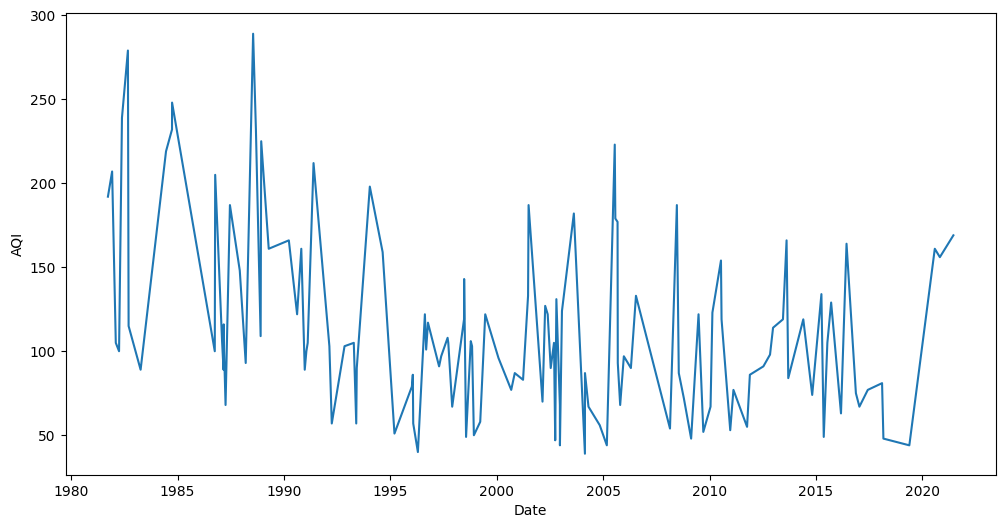

In [23]:
# How does the AQI vary over time for a specific city? (Example: Los Angeles)
los_angeles = df[df['city_ascii'] == 'Los Angeles']
plt.figure(figsize = (12 , 6))
sns.lineplot(data = los_angeles , x='Date' , y = 'AQI')
plt.show()

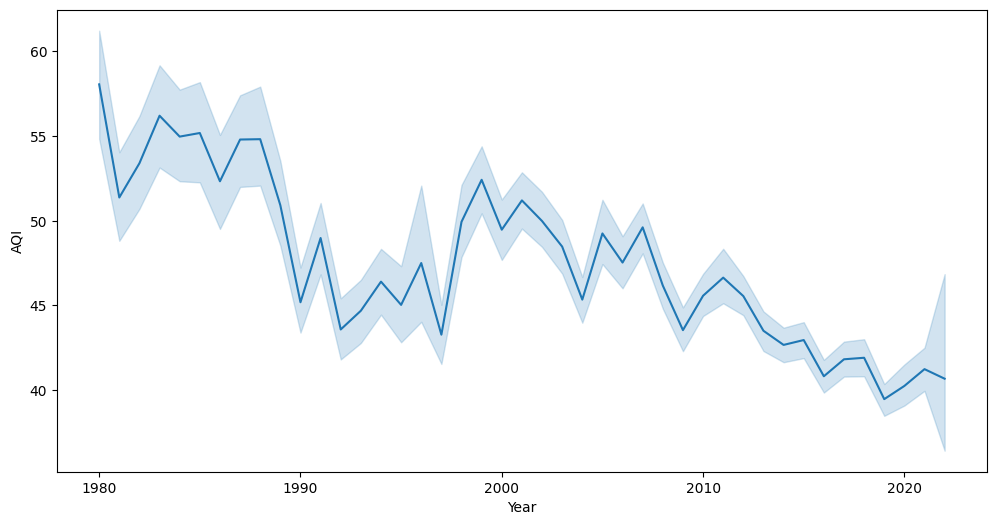

In [24]:
# What is the overall trend of air quality over the years?
df['Year'] = pd.to_datetime(df['Date']).dt.year
avg_aqi_by_year = df.groupby('Year')['AQI'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(data=df , x='Year' , y='AQI')
plt.show()

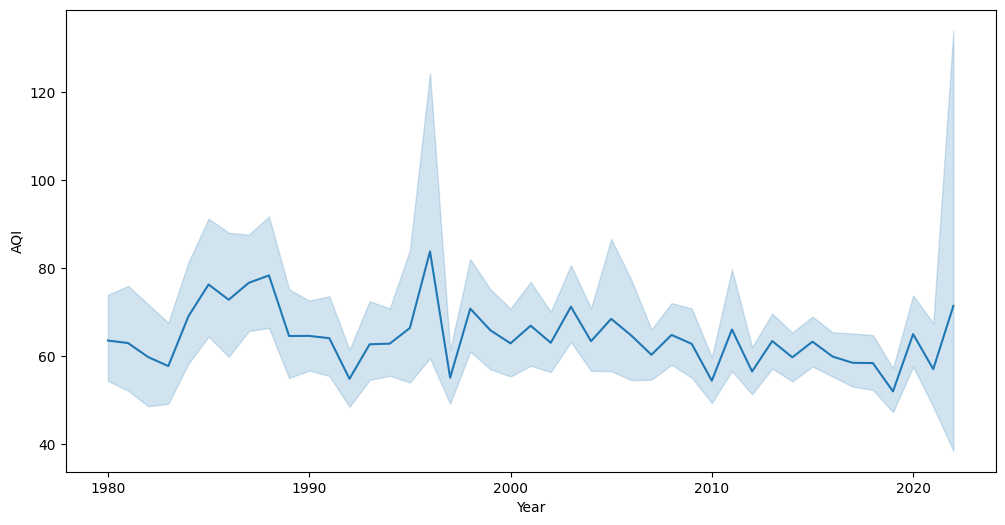

In [25]:
# What is the trend of AQI over time for a specific state? (Example: California)
california_data = df[df['state_name'] == 'California']
avg_aqi_by_year_CA = california_data.groupby('Year')['AQI'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=california_data, x='Year', y='AQI')
plt.show()

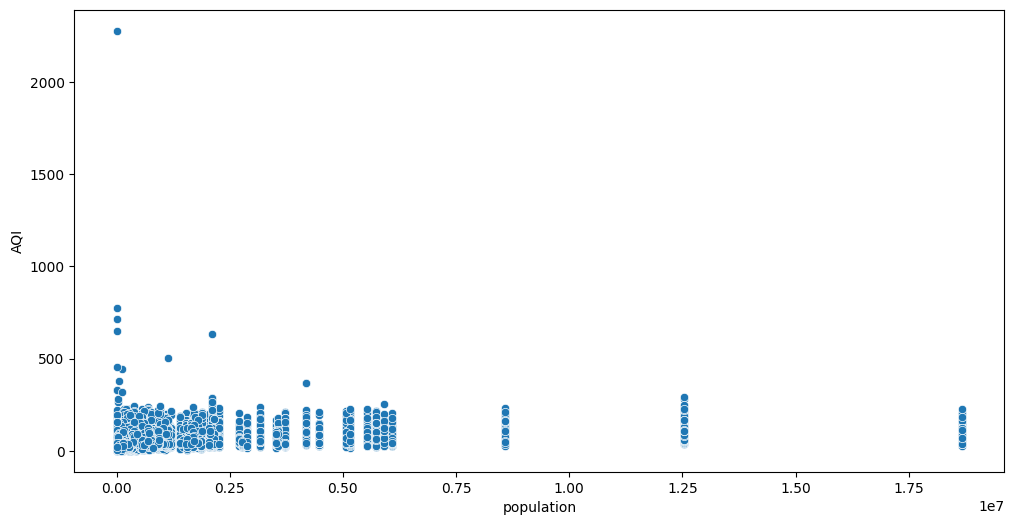

In [26]:
# How does the population size correlate with the AQI?
plt.figure(figsize=(12,6))
sns.scatterplot(data = df , x='population' , y='AQI')
plt.show()

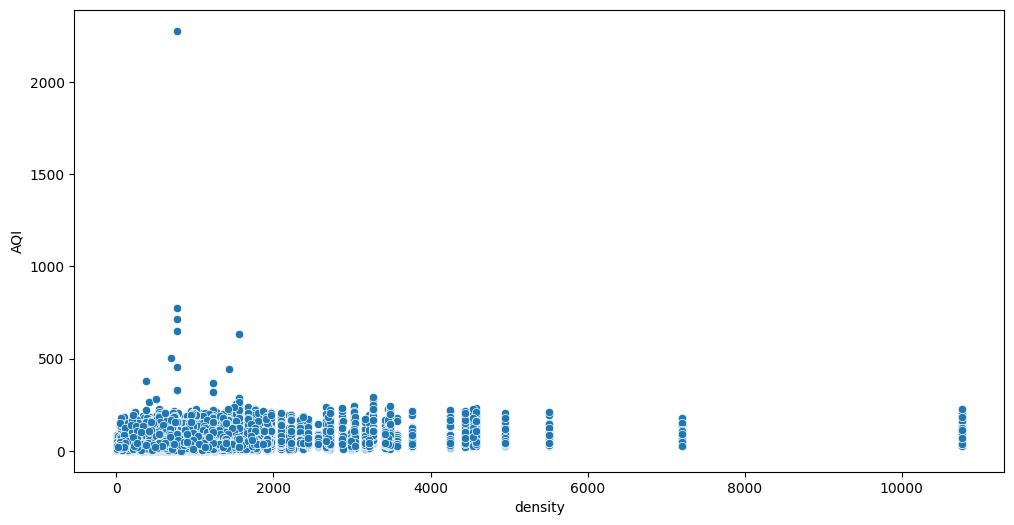

In [27]:
# What is the correlation between density and AQI?
plt.figure(figsize=(12,6))
sns.scatterplot(data = df , x='density' , y='AQI')
plt.show()

In [28]:
# What is the distribution of AQI values for each category?
fig = px.histogram(df, x='AQI', color='Category', nbins=10)
fig.show()

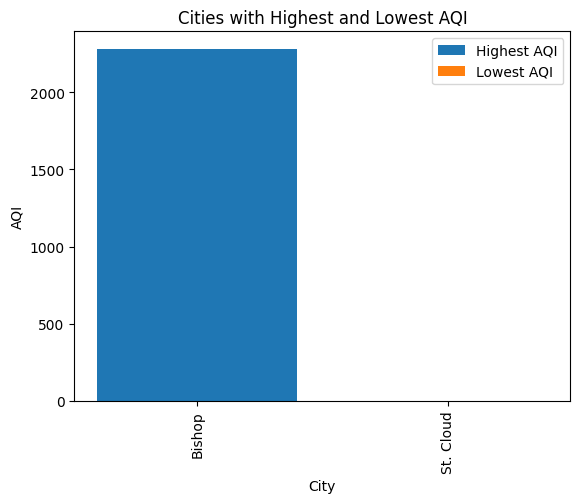

In [29]:
# Which cities have the highest and lowest AQI values recorded in the dataset?

sorted_data = df.sort_values('AQI', ascending=False)
# Select the cities with the highest and lowest AQI values
highest_aqi = sorted_data.head(1)
lowest_aqi = sorted_data.tail(1)
plt.bar(highest_aqi['city_ascii'], highest_aqi['AQI'], label='Highest AQI')
plt.bar(lowest_aqi['city_ascii'], lowest_aqi['AQI'], label='Lowest AQI')
plt.xlabel('City')
plt.ylabel('AQI')
plt.title('Cities with Highest and Lowest AQI')
plt.legend()
plt.xticks(rotation=90)
plt.show()

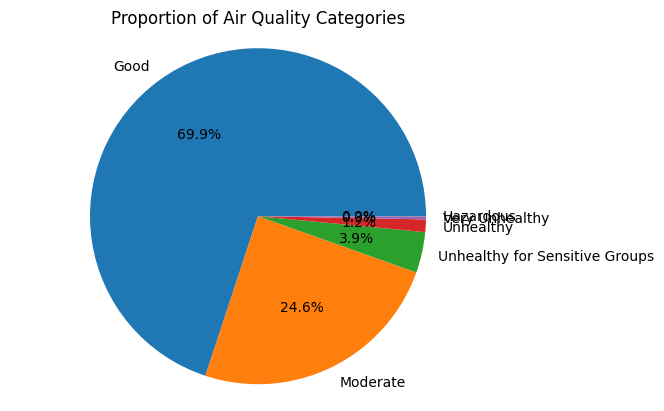

In [30]:
# What is the proportion of different air quality categories across all cities?

category_counts = df['Category'].value_counts()
category_proportions = category_counts / len(df)
plt.pie(category_proportions, labels=category_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Air Quality Categories')
plt.axis('equal')
plt.show()

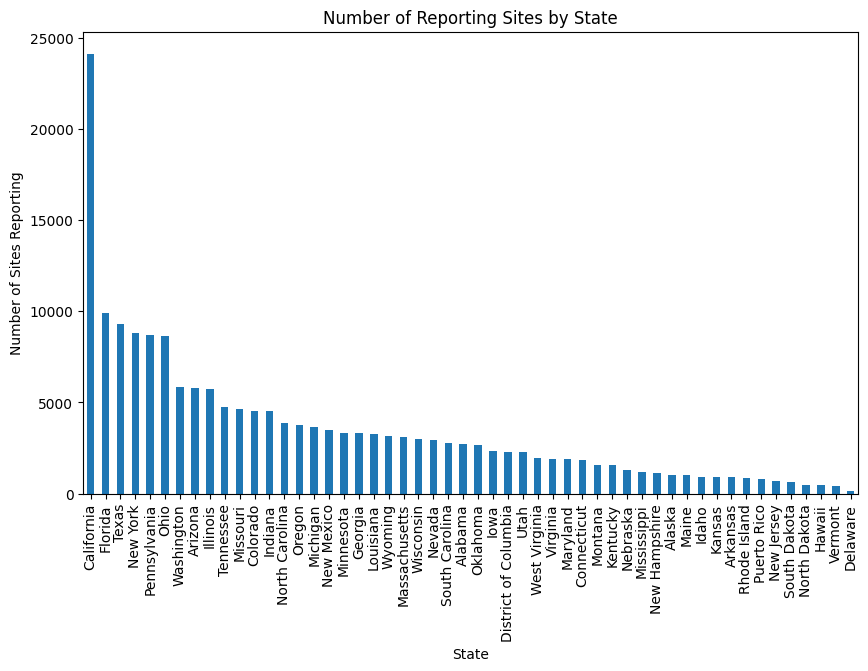

In [31]:
# Which states have the highest number of reporting sites for air quality

# Group the data by state and count the number of reporting sites
state_counts = df.groupby('state_name')['Number_of_Sites_Reporting'].sum().sort_values(ascending=False)
# Create a bar chart
state_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('State')
plt.ylabel('Number of Sites Reporting')
plt.title('Number of Reporting Sites by State')
plt.xticks(rotation=90)
plt.show()

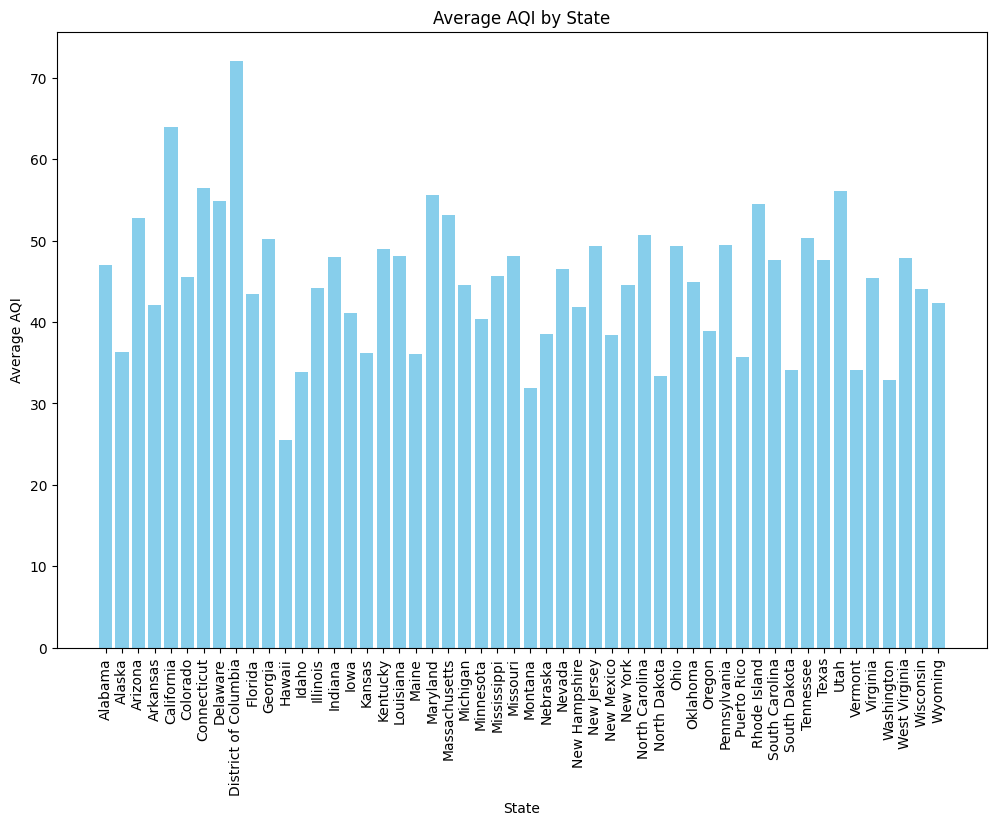

In [32]:
# How does the AQI vary geographically acrossthe United States?

state_aqi = df.groupby('state_name')['AQI'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(state_aqi['state_name'], state_aqi['AQI'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average AQI')
plt.title('Average AQI by State')
plt.xticks(rotation=90)
plt.show()

--------------------------------------

------------------------------------------------------------------

# Data Analysis

In [33]:
#What are the different categories of air quality (AQI) and their frequencies?
aqi_category_counts = df['Category'].value_counts()
aqi_category_counts

Good                              34967
Moderate                          12315
Unhealthy for Sensitive Groups     1961
Unhealthy                           605
Very Unhealthy                      138
Hazardous                            14
Name: Category, dtype: int64

In [34]:
# Which city has the highest population in the dataset?
highest_city_population = df.loc[df['population'].idxmax() , 'city_ascii']
highest_city_population

'New York'

In [35]:
df_cleaned = df.dropna(subset=['city_ascii'])
grouped_by_city = df_cleaned.groupby('city_ascii')
city_stats = grouped_by_city['AQI'].describe()
city_stats

count       mean        std   min    25%   50%    75%    max
city_ascii                                                              
Aberdeen    110.0  23.881818  11.205120   6.0  17.00  21.0  29.00   61.0
Adjuntas     12.0  26.166667  12.401124   9.0  17.25  26.5  34.25   52.0
Adrian       69.0  45.855072  20.556433  16.0  33.00  43.0  50.00  159.0
Aguadilla     2.0  50.000000   9.899495  43.0  46.50  50.0  53.50   57.0
Akron       134.0  51.037313  34.076298   3.0  30.00  42.0  66.50  174.0
...           ...        ...        ...   ...    ...   ...    ...    ...
Yakima      139.0  34.755396  18.724487   8.0  20.00  30.0  44.00   91.0
York        130.0  53.561538  33.036509  16.0  33.25  43.0  59.75  195.0
Youngstown  140.0  59.007143  33.320872  19.0  38.00  49.0  72.25  218.0
Yuba City   120.0  52.175000  28.200859  12.0  33.00  45.0  61.00  164.0
Yuma        111.0  50.837838  28.204623   2.0  34.00  47.0  64.50  161.0

[602 rows x 8 columns]

In [36]:
# What is the average AQI for each state?
average_aqi_by_state = df.groupby('state_name')['AQI'].mean()
average_aqi_by_state

state_name
Alabama                 46.989739
Alaska                  36.333333
Arizona                 52.822314
Arkansas                42.048193
California              64.015880
Colorado                45.511254
Connecticut             56.488414
Delaware                54.888889
District of Columbia    72.062500
Florida                 43.495483
Georgia                 50.256076
Hawaii                  25.528139
Idaho                   33.841216
Illinois                44.158642
Indiana                 48.005256
Iowa                    41.061554
Kansas                  36.211382
Kentucky                48.954965
Louisiana               48.161932
Maine                   36.134956
Maryland                55.616307
Massachusetts           53.211786
Michigan                44.524365
Minnesota               40.334783
Mississippi             45.628342
Missouri                48.099085
Montana                 31.908257
Nebraska                38.555858
Nevada                  46.570822
New

In [37]:
# Which city has the highest density?
highest_density_city = df.loc[df['density'].idxmax() , 'city_ascii']
highest_density_city

'New York'

In [38]:
# What are the most common defining parameters for each AQI category?
top_parameter_by_aqi = df.groupby('Category')['Defining_Parameter'].apply(lambda x: x.value_counts().idxmax())
top_parameter_by_aqi

Category
Good                              Ozone
Hazardous                          PM10
Moderate                          Ozone
Unhealthy                         Ozone
Unhealthy for Sensitive Groups    Ozone
Very Unhealthy                    Ozone
Name: Defining_Parameter, dtype: object

In [39]:
# How many sites reported air quality data for each city on average?
avg_sites_reporting = df.groupby('city_ascii')['Number_of_Sites_Reporting'].mean()
avg_sites_reporting

city_ascii
Aberdeen      1.800000
Adjuntas      1.000000
Adrian        1.000000
Aguadilla     1.000000
Akron         3.895522
                ...   
Yakima        2.172662
York          1.269231
Youngstown    5.064286
Yuba City     1.816667
Yuma          1.252252
Name: Number_of_Sites_Reporting, Length: 602, dtype: float64

In [40]:
# Which state has the highest number of sites reporting air quality data?
state_highest_sites_reporting = df.groupby('state_name')['Number_of_Sites_Reporting'].sum().idxmax()
state_highest_sites_reporting

'California'

In [41]:
# Which timezones are represented in the dataset and how many cities are in each timezone?
timezone_counts = df['timezone'].value_counts()
timezone_counts

America/New_York                17938
America/Chicago                 14016
America/Los_Angeles              8359
America/Denver                   4732
America/Detroit                  1391
America/Indiana/Indianapolis     1143
America/Phoenix                   929
America/Boise                     314
America/Anchorage                 237
America/Puerto_Rico               232
Pacific/Honolulu                  231
America/Indiana/Vincennes         169
America/Matamoros                 143
America/Juneau                     88
America/Menominee                  66
America/Toronto                    10
America/Sitka                       2
Name: timezone, dtype: int64

In [42]:
# How does the AQI vary between different seasons?
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5]
                                else 'Summer' if x in [6,7,8] else 'Fall')
df

Date  AQI                        Category Defining_Parameter  \
0     1998-05-28  115  Unhealthy for Sensitive Groups              Ozone   
1     2001-12-20   97                        Moderate                NO2   
2     1993-06-23   14                            Good                 CO   
3     2014-09-04   48                            Good              Ozone   
4     2016-03-27   43                            Good               PM10   
...          ...  ...                             ...                ...   
49995 1999-10-23   33                            Good              Ozone   
49996 2001-07-16   53                        Moderate              PM2.5   
49997 1982-09-25   93                        Moderate              Ozone   
49998 1992-10-02   26                            Good                NO2   
49999 2009-11-02   20                            Good              Ozone   

       Number_of_Sites_Reporting     city_ascii state_id      state_name  \
0                              5          Omaha       NE        Nebraska   
1                             19        Phoenix       AZ         Arizona   
2                              1         Yakima       WA      Washington   
3                              2        Paducah       KY        Kentucky   
4                              4      Anchorage       AK          Alaska   
...                          ...            ...      ...             ...   
49995                          4       Columbia       SC  South Carolina   
49996                          4      Allentown       PA    Pennsylvania   
49997                          2     Greenville       SC  South Carolina   
49998                          1     Charleston       WV   West Virginia   
49999                          1  Morehead City       NC  North Carolina   

           lat       lng  population  density             timezone  Year  \
0      41.2627  -96.0529    791432.0   1307.0      America/Chicago  1998   
1      33.5722 -112.0892   4187723.0   1236.0      America/Phoenix  2001   
2      46.5923 -120.5496    126487.0   1302.0  America/Los_Angeles  1993   
3      37.0711  -88.6440     24947.0    474.0      America/Chicago  2014   
4      61.1508 -149.1091    248902.0     66.0    America/Anchorage  2016   
...        ...       ...         ...      ...                  ...   ...   
49995  34.0378  -80.9036    609689.0    378.0     America/New_York  1999   
49996  40.5961  -75.4756    688658.0   2664.0     America/New_York  2001   
49997  34.8354  -82.3646    441303.0    905.0     America/New_York  1982   
49998  38.3484  -81.6322    141640.0    579.0     America/New_York  1992   
49999  34.7308  -76.7388      9495.0    498.0     America/New_York  2009   

       Month  Season  
0          5  Spring  
1         12  Winter  
2          6  Summer  
3          9    Fall  
4          3  Spring  
...      ...     ...  
49995     10    Fall  
49996      7  Summer  
49997      9    Fall  
49998     10    Fall  
49999     11    Fall  

[50000 rows x 16 columns]

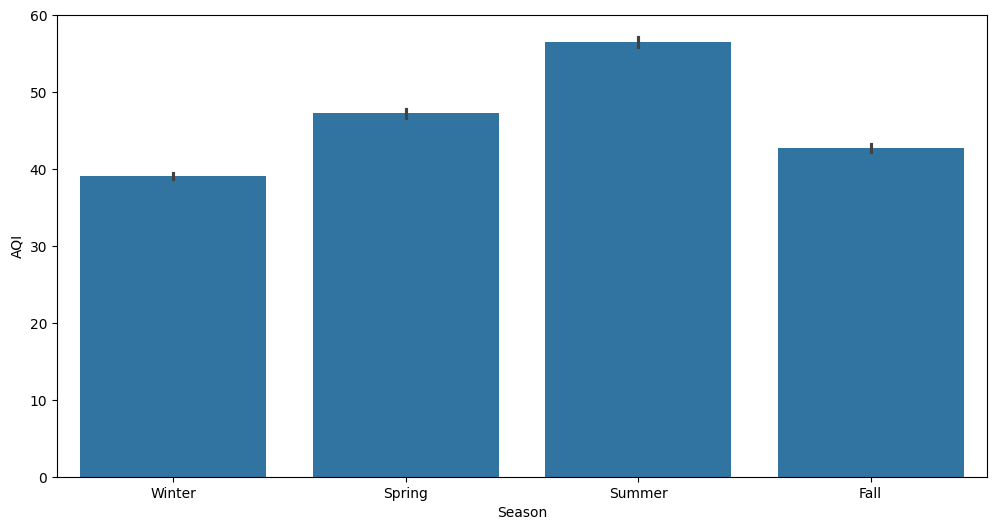

In [43]:
aqi_by_season = df.groupby('Season')['AQI'].mean()
plt.figure(figsize=(12,6))
sns.barplot(data=df , x='Season' , y='AQI' , order = ['Winter' , 'Spring' , 'Summer' , 'Fall'])
plt.show()

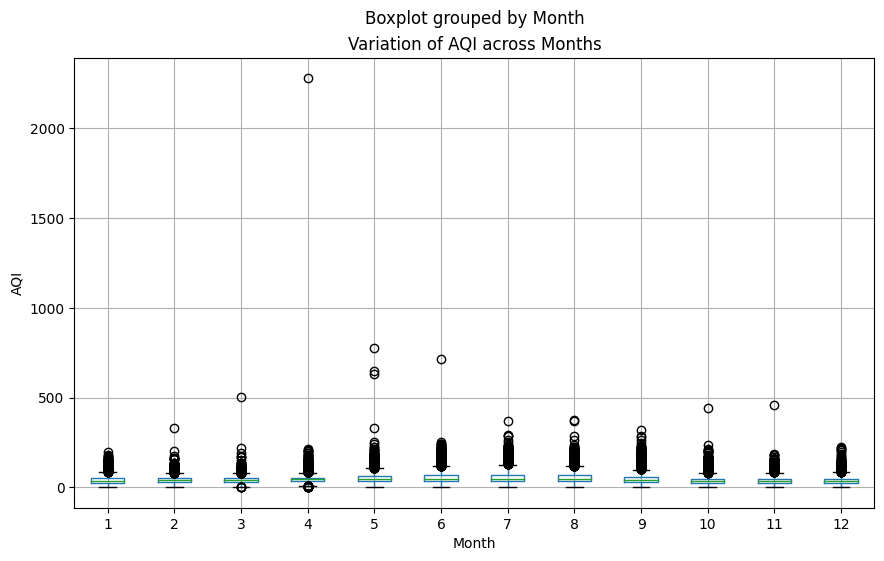

In [44]:
#How does the AQI vary across different months of the year?

df.boxplot(column='AQI', by='Month', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Variation of AQI across Months')
#plt.xticks(rotation=0)
plt.show()

In [45]:
# How does the AQI vary between different days of week?
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
day_categories = pd.Categorical(df['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
avg_aqi_by_day = df.groupby(day_categories)['AQI'].mean()
avg_aqi_by_day

Monday       46.092410
Tuesday      46.997078
Wednesday    46.857342
Thursday     47.360073
Friday       47.702332
Saturday     47.166760
Sunday       45.067477
Name: AQI, dtype: float64

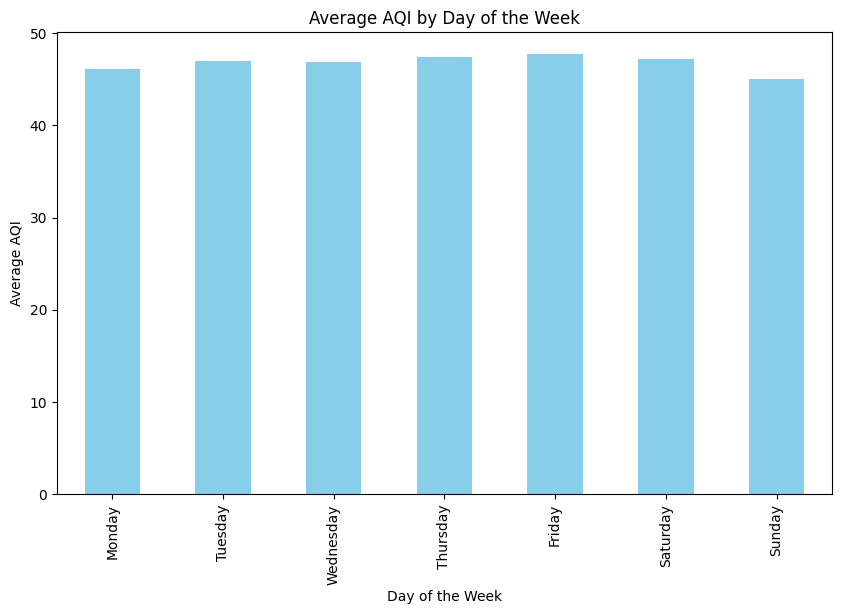

In [46]:
plt.figure(figsize=(10, 6))
avg_aqi_by_day.plot(kind='bar', color='skyblue')
plt.title('Average AQI by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average AQI')
plt.show()

In [47]:
# Is there a correlation between population density and the number of sites reporting air quality data?
corr = df['density'].corr(df['Number_of_Sites_Reporting'])
corr

0.572364078340332

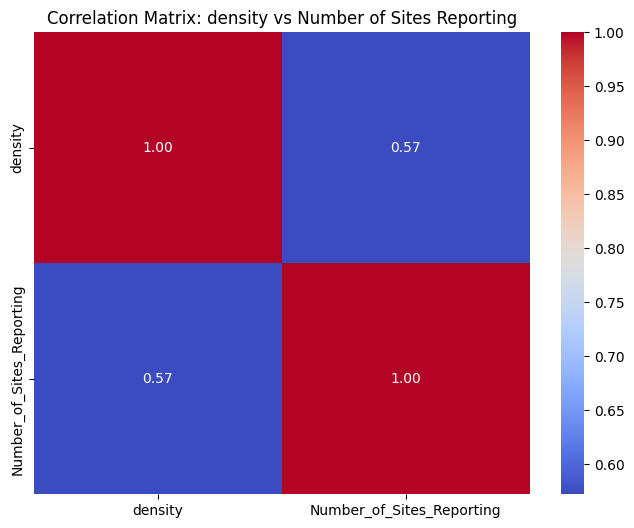

In [48]:
# Heatmap for correlation matrix
correlation_matrix = df[['density', 'Number_of_Sites_Reporting']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: density vs Number of Sites Reporting')
plt.show()


In [49]:
# Is there a correlation between the population size and the number of sites reporting air quality data?
correlation = df['population'].corr(df['Number_of_Sites_Reporting'])
correlation

0.7675175451133044

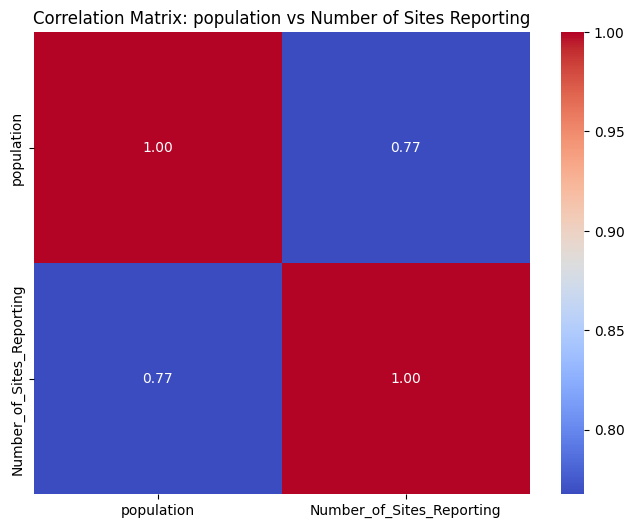

In [50]:
# Heatmap for correlation matrix
correlation_matrix = df[['population', 'Number_of_Sites_Reporting']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: population vs Number of Sites Reporting')
plt.show()

In [51]:
# Is there a relationship between the AQI and the defining parameter for each category?
parameter_frequency_by_category = df.groupby(['Category', 'Defining_Parameter']).size()
print(parameter_frequency_by_category)

Category                        Defining_Parameter
Good                            CO                     2239
                                NO2                    2527
                                Ozone                 19137
                                PM10                   3292
                                PM2.5                  7772
Hazardous                       PM10                     13
                                PM2.5                     1
Moderate                        CO                      741
                                NO2                     606
                                Ozone                  5476
                                PM10                    675
                                PM2.5                  4817
Unhealthy                       CO                       19
                                Ozone                   529
                                PM10                     10
                                PM2.5            

In [52]:
# Which cities have consistently maintained good air quality over the years?
avg_aqi_per_city = df.groupby('city_ascii')['AQI'].mean().reset_index()
#Adjust this threshold based on your definition of good air quality Range from (0 , 50)
threshold = 50
consistently_good_cities = avg_aqi_per_city[avg_aqi_per_city['AQI'] < threshold]['city_ascii']
consistently_good_cities

0              Aberdeen
1              Adjuntas
2                Adrian
5            Alamogordo
6                Albany
             ...       
593          Winchester
594              Winona
595    Wisconsin Rapids
596           Worcester
597              Yakima
Name: city_ascii, Length: 462, dtype: object

In [53]:
# Is there a correlation between air quality and population size for different states?
correlation = df.groupby('state_name')[['AQI', 'population']].corr().iloc[0::2, -1].reset_index()
correlation

state_name level_1  population
0                Alabama     AQI    0.171513
1                 Alaska     AQI    0.106546
2                Arizona     AQI    0.495031
3               Arkansas     AQI    0.199884
4             California     AQI    0.200886
5               Colorado     AQI    0.387368
6            Connecticut     AQI    0.192102
7               Delaware     AQI         NaN
8   District of Columbia     AQI         NaN
9                Florida     AQI    0.245415
10               Georgia     AQI    0.289081
11                Hawaii     AQI    0.393985
12                 Idaho     AQI    0.236469
13              Illinois     AQI    0.398608
14               Indiana     AQI    0.180672
15                  Iowa     AQI    0.120463
16                Kansas     AQI    0.416346
17              Kentucky     AQI    0.011232
18             Louisiana     AQI    0.218654
19                 Maine     AQI    0.095875
20              Maryland     AQI    0.335462
21         Massachusetts     AQI    0.146332
22              Michigan     AQI    0.224351
23             Minnesota     AQI    0.425157
24           Mississippi     AQI    0.034755
25              Missouri     AQI    0.426701
26               Montana     AQI   -0.052436
27              Nebraska     AQI    0.385942
28                Nevada     AQI    0.490725
29         New Hampshire     AQI    0.073582
30            New Jersey     AQI    0.052278
31            New Mexico     AQI    0.431994
32              New York     AQI    0.388051
33        North Carolina     AQI    0.193669
34          North Dakota     AQI    0.149969
35                  Ohio     AQI    0.160027
36              Oklahoma     AQI    0.333509
37                Oregon     AQI    0.110950
38          Pennsylvania     AQI    0.236553
39           Puerto Rico     AQI    0.344868
40          Rhode Island     AQI         NaN
41        South Carolina     AQI    0.194482
42          South Dakota     AQI    0.172578
43             Tennessee     AQI    0.248530
44                 Texas     AQI    0.372990
45                  Utah     AQI    0.226142
46               Vermont     AQI    0.281390
47              Virginia     AQI    0.177328
48            Washington     AQI    0.380412
49         West Virginia     AQI    0.050852
50             Wisconsin     AQI    0.132189
51               Wyoming     AQI   -0.058306

# Data Preprocessing

In [54]:
df

Date  AQI                        Category Defining_Parameter  \
0     1998-05-28  115  Unhealthy for Sensitive Groups              Ozone   
1     2001-12-20   97                        Moderate                NO2   
2     1993-06-23   14                            Good                 CO   
3     2014-09-04   48                            Good              Ozone   
4     2016-03-27   43                            Good               PM10   
...          ...  ...                             ...                ...   
49995 1999-10-23   33                            Good              Ozone   
49996 2001-07-16   53                        Moderate              PM2.5   
49997 1982-09-25   93                        Moderate              Ozone   
49998 1992-10-02   26                            Good                NO2   
49999 2009-11-02   20                            Good              Ozone   

       Number_of_Sites_Reporting     city_ascii state_id      state_name  \
0                              5          Omaha       NE        Nebraska   
1                             19        Phoenix       AZ         Arizona   
2                              1         Yakima       WA      Washington   
3                              2        Paducah       KY        Kentucky   
4                              4      Anchorage       AK          Alaska   
...                          ...            ...      ...             ...   
49995                          4       Columbia       SC  South Carolina   
49996                          4      Allentown       PA    Pennsylvania   
49997                          2     Greenville       SC  South Carolina   
49998                          1     Charleston       WV   West Virginia   
49999                          1  Morehead City       NC  North Carolina   

           lat       lng  population  density             timezone  Year  \
0      41.2627  -96.0529    791432.0   1307.0      America/Chicago  1998   
1      33.5722 -112.0892   4187723.0   1236.0      America/Phoenix  2001   
2      46.5923 -120.5496    126487.0   1302.0  America/Los_Angeles  1993   
3      37.0711  -88.6440     24947.0    474.0      America/Chicago  2014   
4      61.1508 -149.1091    248902.0     66.0    America/Anchorage  2016   
...        ...       ...         ...      ...                  ...   ...   
49995  34.0378  -80.9036    609689.0    378.0     America/New_York  1999   
49996  40.5961  -75.4756    688658.0   2664.0     America/New_York  2001   
49997  34.8354  -82.3646    441303.0    905.0     America/New_York  1982   
49998  38.3484  -81.6322    141640.0    579.0     America/New_York  1992   
49999  34.7308  -76.7388      9495.0    498.0     America/New_York  2009   

       Month  Season        Day  
0          5  Spring   Thursday  
1         12  Winter   Thursday  
2          6  Summer  Wednesday  
3          9    Fall   Thursday  
4          3  Spring     Sunday  
...      ...     ...        ...  
49995     10    Fall   Saturday  
49996      7  Summer     Monday  
49997      9    Fall   Saturday  
49998     10    Fall     Friday  
49999     11    Fall     Monday  

[50000 rows x 17 columns]

In [55]:
cols_to_drop = ['Date','city_ascii','state_id','state_name','lat','lng','timezone','Year','Month','Season','Day']

In [56]:
df.drop(columns = cols_to_drop ,axis = 1 ,  inplace = True)

In [57]:
df

AQI                        Category Defining_Parameter  \
0      115  Unhealthy for Sensitive Groups              Ozone   
1       97                        Moderate                NO2   
2       14                            Good                 CO   
3       48                            Good              Ozone   
4       43                            Good               PM10   
...    ...                             ...                ...   
49995   33                            Good              Ozone   
49996   53                        Moderate              PM2.5   
49997   93                        Moderate              Ozone   
49998   26                            Good                NO2   
49999   20                            Good              Ozone   

       Number_of_Sites_Reporting  population  density  
0                              5    791432.0   1307.0  
1                             19   4187723.0   1236.0  
2                              1    126487.0   1302.0  
3                              2     24947.0    474.0  
4                              4    248902.0     66.0  
...                          ...         ...      ...  
49995                          4    609689.0    378.0  
49996                          4    688658.0   2664.0  
49997                          2    441303.0    905.0  
49998                          1    141640.0    579.0  
49999                          1      9495.0    498.0  

[50000 rows x 6 columns]

# Data Transformation

In [58]:
numerical_cols = ['Number_of_Sites_Reporting' , 'population' , 'density']
categorical_cols = ['Category' ,'Defining_Parameter']

In [59]:
cat_pipeline = Pipeline ( steps = [("Encoder" , OneHotEncoder(handle_unknown='ignore') )] )
num_pipeline = Pipeline ( steps = [("Scaler" , StandardScaler())] )

In [60]:
Column_Transformer = ColumnTransformer(transformers = [('num' , num_pipeline , numerical_cols) , ('cat' , cat_pipeline , categorical_cols)])
Column_Transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Scaler', StandardScaler())]),
                                 ['Number_of_Sites_Reporting', 'population',
                                  'density']),
                                ('cat',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Category', 'Defining_Parameter'])])

# Data Splitting

In [61]:
x, y = df.drop("AQI",axis=1) , df["AQI"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [62]:
x_train_transformer = Column_Transformer.fit_transform(x_train)
x_test_transformer = Column_Transformer.transform(x_test)

# Modelling

# GridSearchCV

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.

As mentioned above, the performance of a model significantly depends on the value of hyperparameters.

Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values.

Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

# Using XGBRegressor

In [63]:
XGBR = XGBRegressor()
param_grid = {
    'max_depth': [3,4,5,6,8,10,12,15],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(estimator=XGBR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_transformer, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 6, 'n_estimators': 100}
Best Score: 0.8366885801008859


In [64]:
XGBR = XGBRegressor(max_depth=6 , n_estimators=100)
XGBR.fit(x_train_transformer , y_train)
y_pred_XGBR = XGBR.predict(x_test_transformer)
print(" r2_score ",r2_score(y_test , y_pred_XGBR))
print(" train_Score ",XGBR.score(x_train_transformer , y_train))
print(" test_Score ",XGBR.score(x_test_transformer , y_test))
print(" mean_squared_error : ",mean_squared_error(y_test , y_pred_XGBR))

 r2_score  0.595971403051238
 train_Score  0.904694793567044
 test_Score  0.595971403051238
 mean_squared_error :  387.94336612914117


In [65]:
# Perform cross-validation
XGBR_cross = XGBRegressor(max_depth=7 , n_estimators=100 ,random_state=42)
cv_scores_XGBR = cross_val_score(XGBR, x_train_transformer, y_train)

# Print the cross-validation scores
print('Scores: ', cv_scores_XGBR)
print('Mean: ', np.mean(cv_scores_XGBR))
print('Std: ', np.std(cv_scores_XGBR))

Scores:  [0.74312832 0.843737   0.87316784 0.85163931 0.87177043]
Mean:  0.8366885801008859
Std:  0.048141871721458986


# Using Linear Regression

In [66]:
LR = LinearRegression(fit_intercept=False)
LR.fit(x_train_transformer , y_train)
y_pred = LR.predict(x_test_transformer)

print("r2_score ",r2_score(y_test , y_pred))
print("train_Score ",LR.score(x_train_transformer , y_train))
print("test_Score ",LR.score(x_test_transformer , y_test))
print("mean_squared_error : ",mean_squared_error(y_test , y_pred))

r2_score  0.8621074711932646
train_Score  0.7983344330731166
test_Score  0.8621074711932646
mean_squared_error :  132.40273632445025


In [67]:
# Perform cross-validation
cross_scores = cross_val_score(LR, x_train_transformer, y_train)

# Print the cross-validation scores
print('Scores: ', cross_scores)
print('Mean: ', np.mean(cross_scores))
print('Std: ', np.std(cross_scores))

Scores:  [0.64458506 0.81000968 0.81545333 0.85323974 0.84383291]
Mean:  0.7934241454658225
Std:  0.07620024469956682


# Using Random Forest

In [68]:
RF = RandomForestRegressor(n_estimators=100)
RF.fit(x_train_transformer , y_train)
y_pred_RF = RF.predict(x_test_transformer)

print(" r2_score ",r2_score(y_test , y_pred_RF))
print(" train_Score ",RF.score(x_train_transformer , y_train))
print(" test_Score ",RF.score(x_test_transformer , y_test))
print(" mean_squared_error : ",mean_squared_error(y_test , y_pred_RF))

 r2_score  0.7857895348791739
 train_Score  0.9092246395951225
 test_Score  0.7857895348791739
 mean_squared_error :  205.6822945866898


# Using K-NN

In [69]:
for i in range(1,11):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train_transformer , y_train)
    y_pred_KNN = KNN.predict(x_test_transformer)
    print("n_neighbors : ",i )
    print("mean_squared_error : ",mean_squared_error(y_test , y_pred_KNN))
    print(" r2_score ",r2_score(y_test , y_pred_KNN))
    print(" train_Score ",KNN.score(x_train_transformer , y_train))
    print(" test_Score ",KNN.score(x_test_transformer , y_test))
    print("-"*50)

n_neighbors :  1
mean_squared_error :  495.218
 r2_score  0.48424885900183856
 train_Score  0.8557454321245905
 test_Score  0.48424885900183856
--------------------------------------------------
n_neighbors :  2
mean_squared_error :  210.87315
 r2_score  0.7803834518971918
 train_Score  0.8024708981400066
 test_Score  0.7803834518971918
--------------------------------------------------
n_neighbors :  3
mean_squared_error :  172.07334444444444
 r2_score  0.8207920072925623
 train_Score  0.8253847107517753
 test_Score  0.8207920072925623
--------------------------------------------------
n_neighbors :  4
mean_squared_error :  166.4696875
 r2_score  0.8266280077264309
 train_Score  0.8296670031650029
 test_Score  0.8266280077264309
--------------------------------------------------
n_neighbors :  5
mean_squared_error :  194.82968000000002
 r2_score  0.7970921296069475
 train_Score  0.8335433239718463
 test_Score  0.7970921296069475
--------------------------------------------------
n_nei

In [70]:
KNN = KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train_transformer , y_train)
y_pred_KNN = KNN.predict(x_test_transformer)

print(" r2_score ",r2_score(y_test , y_pred_KNN))
print(" train_Score ",KNN.score(x_train_transformer , y_train))
print(" test_Score ",KNN.score(x_test_transformer , y_test))
print(" mean_squared_error : ",mean_squared_error(y_test , y_pred_KNN))

 r2_score  0.8266280077264309
 train_Score  0.8296670031650029
 test_Score  0.8266280077264309
 mean_squared_error :  166.4696875


# Evaluation & Testing

In [77]:
Test = x_test.sample(1)
Test_idx = Test.index

Test_new_entry = Column_Transformer.transform(Test)
Test_prediction = RF.predict(Test_new_entry)

Actual_AQI = df.loc[Test_idx][['AQI']]
Predicted_AQI = Test_prediction[0]

print("Actual AQI : ", Actual_AQI)
print("Predicted AQI : ", round(Predicted_AQI,1))

Actual AQI :         AQI
33340   40
Predicted AQI :  37.1


# Saving Model

In [72]:
model = RF

In [73]:
import joblib

In [74]:
joblib.dump(Column_Transformer, 'Transformer.h5')

['Transformer.h5']

In [75]:
joblib.dump(model , 'RF_Model.h5')

['RF_Model.h5']

In [76]:
df

AQI                        Category Defining_Parameter  \
0      115  Unhealthy for Sensitive Groups              Ozone   
1       97                        Moderate                NO2   
2       14                            Good                 CO   
3       48                            Good              Ozone   
4       43                            Good               PM10   
...    ...                             ...                ...   
49995   33                            Good              Ozone   
49996   53                        Moderate              PM2.5   
49997   93                        Moderate              Ozone   
49998   26                            Good                NO2   
49999   20                            Good              Ozone   

       Number_of_Sites_Reporting  population  density  
0                              5    791432.0   1307.0  
1                             19   4187723.0   1236.0  
2                              1    126487.0   1302.0  
3                              2     24947.0    474.0  
4                              4    248902.0     66.0  
...                          ...         ...      ...  
49995                          4    609689.0    378.0  
49996                          4    688658.0   2664.0  
49997                          2    441303.0    905.0  
49998                          1    141640.0    579.0  
49999                          1      9495.0    498.0  

[50000 rows x 6 columns]